# L02- Artifical Nerual Network

- This notebook was prepared for MECE 610: Machine Learning Control in Engineering Application course at the University of Alberta
- The notebook and examples are developed by **Armin Norouzi**

**Table of Contents:**

1.  Neural Networks (NN)
    1.  Artifical Nerual Network background
    2. Forward Propagation
    3.  Back Propagation
    4.  Regularization
    5.  NN for Regression
2.  Example
    1.  Classification based on equations
    2.  Classification using sklearn
    3.  Regression using sklearn



## Neural Networks (NN)



### Artificial Neural Network (ANN)- Background



-   is a set of algorithms that try to distinguish the correlation between a set of data using rules thought to mimic human brain operation
-   An ANN includes simulated neurons where each node connects to other nodes in neurons through connections that match biological axon-synapse-dendrite joints.



**ANN structure**



-   Each link has a weight, which manages the strength of one node's influence on another.
-   The neurons are usually organized into multiple layers.
-   The nodes that receive external data as input are the input layer;
    -   the output layer produces the predicted output data.
    -   In the middle, hidden layers exist between the input layer and output layer that can be varied in size and structure.

![](https://github.com/arminnorouzi/ML-developed_course/blob/main/L02_ANN/figures/ml_full_nn.PNG?raw=true)

### Computing a Neural Network's Output - Forward Propagation



-   To drive output of neural network, look at single neuron.

-   first part of neuron in summation part which weights $w$ multiply to input $x$ and bias value $b$ is added to generate $z$
-   $x$ represents the input vector and contains $x_1, \dots, x_3$
-   In each neuron, there is two steps of computations
    -   first generating $z$
    -   and then calculating $a$ for each node ($a$ stands for the activation function):

\begin{equation}\label{eq:reg_func}
z = w^T x  + b
\end{equation}

-   where $x = [x_1,x_2,x_3]^T$ and $w$ is also a three component vector $ 1 \times 3 $
-   then activation function $f$ is calculated based on the value of $z$ as

$$ a = f(z)$$



**ANN Schematic for one single neuron**

![](https://github.com/arminnorouzi/ML-developed_course/blob/main/L02_ANN/figures/NN_oneneuron.PNG?raw=true)



**From single neuron to more complex**




-   In general, for given input data $x$ as $x = [x_1,x_2,x_3]^T = a^{[0]}$,

\begin{equation}
\begin{split}
    z^{[1]} &= W^{[1]} a^{[0]} + b^{[1]}\\
    a^{[1]} &= f(z^{[1]})\\
    z^{[2]} &= W^{[2]} a^{[1]} + b^{[2]}\\
    a^{[2]} &= f(z^{[2]})\\
    \hat{y} &= a^{[2]}\\
\end{split}
\end{equation}



-   Without vectorizing we have to loop through
-   the output can be calculated for data set with $m$ data as:

\begin{equation}\label{eq:for1}
\begin{split}
    \text{for }i&= 1\text{ to }m\\
    &z^{[1](i)} = W^{[1]} x^{(i)} + b^{[1]}\\
    &a^{[1](i)} = f(z^{[1](i)})\\
    &z^{[2](i)} = W^{[2]} a^{[1](i)} + b^{[2]}\\
    &a^{[2](i)} = f(z^{[2](i)})\\
    &\hat{y}^{(i)} = a^{[2](i)}\\
\end{split}
\end{equation}



** Vectorizing across multiple examples**



1.  to train $W$ and $b$, run this `for` loop need for each iteration of the gradient descent
2.  vectorizing across multiple examples can make training process more efficient.
3.  Now vectorize prevous for loop

\begin{equation}
\begin{split}
    Z^{[1]} &= W^{[1]} X + b^{[1]}\\
    A^{[1]} &= f(Z^{[1]})\\
    Z^{[2]} &= W^{[2]} A^{[1]} + b^{[2]}\\
    A^{[2]} &= f(Z^{[2]})\\
    \hat{Y} &= A^{[2]}\\
\end{split}
\end{equation}

-   where

\begin{equation}
\begin{split}
X & = \left[x^{(1)}, x^{(2)}, \ldots x^{(m)}  \right]_{n_x \times m}\\
Z^{[1]} & = \left[  z^{[1](1)}, z^{[1](2)}, \ldots z^{[1](m)}  \right]_{n_{hl} \times m}\\
A^{[1]} & = \left[  a^{[1](1)}, a^{[1](2)}, \ldots a^{[1](m)}  \right]_{n_{hl} \times m}\\
\end{split}
\end{equation}

-   for $X$ the column dimension $m$ is the number of data in the data set while the row dimension $n_x$ is the number of input features
-   for $A^{[1]}$ and $Z^{[1]}$ the row dimension $n_{hl}$ is  the number of neurons in $^{[1]}$ and the number of data is the column direction



**Activation function $f(z)$**



-   for ANN, the activation function of a node defines the output of that node given an input or set of inputs
-   for example, an integrated circuit can be seen as a digital network of activation functions that can be "ON" (1) or "OFF" (0), depending on input.
-   However, only nonlinear activation functions allow ANN to give complex outputs using only a small number of nodes
-   these activation functions are called nonlinearities and common examples are given below



**Nonlinear activation functions**



-   Sigmoid activation functions

\begin{equation}\label{eq:sig}
\begin{split}
\sigma(z) & = \frac{1}{1 + e^{-z}} \\
\frac{d}{dz} \sigma(z) & = \sigma(z) (1 - \sigma(z))
\end{split}
\end{equation}

-   Hyperbolic tangent

\begin{equation}\label{eq:tan}
\begin{split}
\tanh(z) & = \frac{e^z - e^{-z}}{e^z + e^{-z}} \\
\frac{d}{dz} \tanh(z) & = 1 - (\tanh(z))^2
\end{split}
\end{equation}

-   Rectified linear unit (ReLU)

\begin{equation}\label{eq:relu}
\begin{split}
\text{ReLU}(z) &= \begin{cases}
         0 & \text{if } z\leq0 \\
         z & \text{if } z>0 \\
    \end{cases}\\
\frac{d}{dz} \text{ReLU}(z) &= \begin{cases}
         0 & \text{if } z<0 \\
         1 & \text{if } z>0 \\
    \end{cases}
\end{split}
\end{equation}



**Gradient Decent (GD) for Neural Network**



-   the cost function is defined as

\begin{equation}
J(W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}) = \frac{1}{m} \sum_{i = 1}^m {L}(\hat{Y}, Y)
\end{equation}

-   where ${L}(\hat{y}, y)$ is the loss function
    -   **regression:** usually MSE
    -   **classification:** usually logistic
-   the GD can be defined as

\begin{equation}
\begin{split}
    \text{loop \{ }&\\
    & \text{Compute predictions} (\hat{y}^{(1)}, \ldots, \hat{y}^{(m)})\\
        & \\
    & dW^{[1]} = \frac{dJ}{dW^{[1]}} \\
    & dW^{[2]} = \frac{dJ}{dW^{[2]}} \\
    & db^{[1]} = \frac{dJ}{db^{[1]}} \\
    & db^{[2]} = \frac{dJ}{db^{[2]}} \\
    & \\
    & W^{[1]}:=W^{[1]} - \alpha dW^{[1]} \\
    & b^{[1]}:=b^{[1]} - \alpha db^{[1]} \\
    & W^{[2]}:=W^{[2]} - \alpha dW^{[2]} \\
    & b^{[2]}:=b^{[2]} - \alpha db^{[2]} \\ \}
\end{split}
\end{equation}

-   where $\alpha$ is the learning rate.



### Backpropagation



-   start with simplest possible network a single neuron shown below


![](https://github.com/arminnorouzi/ML-developed_course/blob/main/L02_ANN/figures/NN_oneneuron.PNG?raw=true)



**Single neuron calculations**



-   this network input vector has three element as $x = [x_1,x_2,x_3]^T$
-   here we derive the equation for single data set
-   later we need to run these equation in a `for` loop for all equation
-   here $m = 1$ and cost function equals to loss function as $J(w, b) = {L}(\hat{Y}, y)$
-   and as $\hat{y} = a$, the loss function is $J(w, b) = {L}(a, y)$



**calculated derivative of cost function with respect to $w$**



-   to find $dw$ use: $dw = \frac{\partial {L}(a, y)}{ \partial w}$
-   using the chain rule this can be written as: $dw = \frac{\partial {L}(a, y)}{ \partial a} \frac{\partial a}{ \partial z} \frac{\partial z}{ \partial w}$



**Define $da$ and $dz$  from Loss function**



$$da = \frac{\partial {L}(a, y)}{ \partial a} $$

\begin{equation} \label{dz}
dz = \frac{\partial {L}(a, y)}{ \partial a} \frac{\partial a}{ \partial z}
\end{equation}



**Logistic loss function for $a$ to get $da$**



-   the logistic loss function is $L = -y \log(a) - (1-y) \log(1-a) $
-   first calculate $da$ by using logistic loss function

\begin{equation} \label{da}
\begin{split}
da &= \frac{\partial}{ \partial a} (-y \log(a) - (1-y) \log(1-a))\\
& = \frac{-y}{a} + \frac{1-y}{1-a}
\end{split}
\end{equation}



**Sigmoid function to get $dz$**



-   using sigmoid function, $a = \sigma(z)$ and Eq. \ref{dz} to get $dz$ as

\begin{equation}\label{dz2}
\begin{split}
dz &= \frac{\partial {L}(a, y)}{ \partial a} \frac{\partial a}{ \partial z}\\
&= da \frac{\partial a}{ \partial z}\\
&=da (a)(1-a)
\end{split}
\end{equation}

-   substituting Eq.\ref{da} in Eq.\ref{dz2}, $dz$ is simplified to

\begin{equation}\label{dz3}
\begin{split}
dz&=\frac{-y}{a} + \frac{1-y}{1-a} (a)(1-a) \\
&= a - y
\end{split}
\end{equation}



**Find $dw$**



-   next substituting $\partial z / \partial w = x$, $dw$ can be found as

\begin{equation}\label{dw}
\begin{split}
dz&= a - y\\
dw &= x dz
\end{split}
\end{equation}



**Find $dw$**



-   repeating the same procedure for $db$ which is

\begin{equation}\label{db}
\begin{split}
dz&= a - y\\
db &= dz
\end{split}
\end{equation}



**To generalizing these equations**



-   now add a hidden layer
-   the difference is we need to go through this process one more time using the same concepts
-   here the hidden layer activation function is a general form of $f(z)$, so $f'(z) = \partial f / \partial z$

\begin{equation}\label{derivates}
\begin{split}
dz^{[2]} &= a^{[2]} - y\\
dW^{[2]} &= dz^{[2]}a^{[2]T}\\
db^{[2]} &= dz^{[2]}\\
dz^{[1]} &= W^{[2]}dz^{[2]} \odot f'^{[1]}(z^{[1]})\\
dw^{[1]} &= dz^{[1]}x^T\\
db^{[1]} &= dz^{[1]}\\
\end{split}
\end{equation}

-   where \`\`$\odot$'' is element wise multiplication
-   as this must be run for the entire data set it is an inefficient way to run GD
-   rather, vectorizing by stacking different examples in a vector as:

\begin{equation}\label{derivatesVector}
\begin{split}
dZ^{[2]} &= A^{[2]} - Y\\
dW^{[2]} &= \frac{1}{m} dZ^{[2]}A^{[2]T}\\
db^{[2]} &= \frac{1}{m} \sum_{i=1}^m  dZ^{[2]}\\
dZ^{[1]} &= W^{[2]T}dZ^{[2]} \odot f'^{[1]}(Z^{[1]})\\
dW^{[1]} &= \frac{1}{m} dZ^{[1]}X^T\\
db^{[1]} &= \frac{1}{m} \sum_{i=1}^m  dZ^{[1]}\\
\end{split}
\end{equation}



### Regularization



-   the Cost function can be rewritten by adding regularization term as

\begin{equation}
	J(W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}) = \frac{1}{m} \sum_{i = 1}^m {L}(\hat{Y}, Y) + \frac{\lambda}{2m} \sum_{l = 1}^L ||w^{[l]}||_2^2
\end{equation}

-   where ${L}(\hat{y}, y)$ is loss function
-   $\lambda$ is regularization coefficient
-   and $||w^{[l]}||_2^2$ is the Euclidean norm defined as

\begin{equation}
	||w^{[l]}||_2^2 = \sum_{i = 1}^{n^{[l]}} \sum_{j = 1}^{n^{[l-1]}} (w_{ij}^{[l]})^2
\end{equation}



**Gradient decent with regularization**



-   the derivatives for GD are now:

\begin{equation}
	dW^{[l]} = \frac{dJ}{dW^{[l]}} = dW_{\text{without regularization}}^{[l]} + \frac{\lambda}{m} W^{[l]}
\end{equation}

-   where $dW_{\text{without regularization}}^{[l]} $ is from Eq \ref{derivatesVector}
-   the weights update can be written as

\begin{equation}
	W^{[l]} = W^{[l]} - \alpha ( dW_{\text{without regularization}}^{[l]} + \frac{\lambda}{m} W^{[l]})
\end{equation}

or rewritten in this form

\begin{equation}
	W^{[l]} = ( 1- \frac{\alpha \lambda}{m})  W^{[l]} - \alpha ( dW_{\text{without regularization}}^{[l]})
\end{equation}

-   as $ ( 1- \frac{\alpha \lambda}{m}) $ is always less than one
-   in this formulation the weights decrease for each iteration update
-   This is the one reason, L2 regularization also called weight decay.



### Regression problem



-   Regression models deals with predicting a continuous value
-   for example given injected fuel amount, common rail pressure, and load, predict the NOx emission of a diesel engine
-   The mathematics behind regression follows that of classification but with a different loss function
    -   i.e. instead of logistic loss function the MSE loss function is used for the regression problem
        -   Alternative to MSE is the MAE loss
    -   a \`\`Regression Loss Function'' is used.
-   Some different types of regression loss function for regression used for different purposes are
    -   Mean Squared Error Loss
    -   Mean Squared Logarithmic Error Loss
    -   Mean Absolute Error Loss
-   in this course, the python `sklearn` library is used to illustrate different examples
-   this library uses the most well-known loss function the Mean Squared Error Loss which is

\begin{equation}
	{L}(\hat{y}, y) = \frac{1}{m} \sum_{i = 1}^m (\hat{y}_i - y_i)^2
\end{equation}



## ANN - Example classification - based on equations



### One Hidden layer ANN - Solving Gradient descent in ANN



In [133]:
#import necessary libraries
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')


# from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model

**Import data and show data and plot**



In [134]:
data = pd.read_csv('https://raw.githubusercontent.com/arminnorouzi/ML-developed_course/main/Data/Engine_NOx_classification.csv')
data.head()

,Load [ft.lb],Engine speed [rpm],mf [mg/stroke],Pr [PSI],NOx [ppm],High NOx
0,50,2502.400000,31.222326,15285.16744,103.899724,0
1,50,2248.666667,30.116667,15155.13333,112.610181,0
2,75,2502.000000,38.300000,15356.00000,114.789893,0
3,100,2504.000000,42.900000,15296.00000,125.411970,0
4,75,2262.000000,34.100000,15254.00000,126.524679,0


In [135]:
cdf = data[['Load [ft.lb]','Engine speed [rpm]','mf [mg/stroke]','Pr [PSI]', 'High NOx']]

msk = np.random.rand(len(data)) < 0.8
train = cdf[msk]
test = cdf[~msk]

**Plot training data then test data**



Text(0, 0.5, 'Engine speed [rpm]')

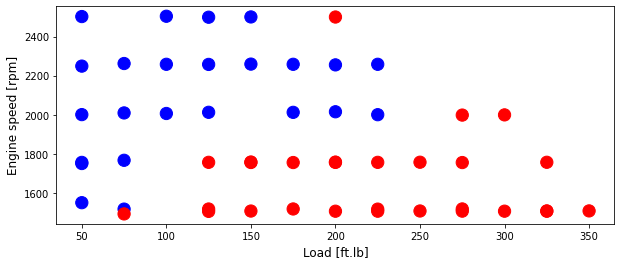

In [136]:
colors = {0: 'blue', 1:'red', 2:'green', 3:'coral', 4:'orange', 5:'black'}

area = 150
# area = 200
plt.figure(1, figsize=(10, 4))
plt.scatter(train['Load [ft.lb]'], train['Engine speed [rpm]'], s=area, c=np.array(train['High NOx'].map(colors).tolist()), alpha=1)

plt.xlabel('Load [ft.lb]', fontsize=12)
plt.ylabel('Engine speed [rpm]', fontsize=12)

**Plot test data**



Text(0, 0.5, 'Engine speed [rpm]')

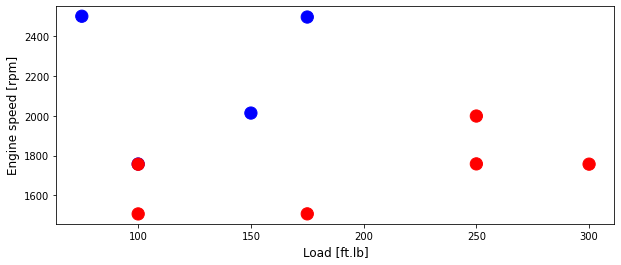

In [137]:
area = 150
# area = 200
plt.figure(1, figsize=(10, 4))
plt.scatter(test['Load [ft.lb]'], test['Engine speed [rpm]'], s=area, c=np.array(test['High NOx'].map(colors).tolist()), alpha=1)

plt.xlabel('Load [ft.lb]', fontsize=12)
plt.ylabel('Engine speed [rpm]', fontsize=12)

**Set Test and training data - preprocessing**



In [138]:
from sklearn import preprocessing

# train_x = np.asanyarray(train[['Load [ft.lb]','Engine speed [rpm]','mf [mg/stroke]','Pr [PSI]']])
# train_y = np.asanyarray(train[['High NOx']])

# test_x = np.asanyarray(test[['Load [ft.lb]','Engine speed [rpm]','mf [mg/stroke]','Pr [PSI]']])
# test_y = np.asanyarray(test[['High NOx']])

train_x = np.asanyarray(train[['Load [ft.lb]','Engine speed [rpm]']])
train_y = np.asanyarray(train[['High NOx']])

test_x = np.asanyarray(test[['Load [ft.lb]','Engine speed [rpm]']])
test_y = np.asanyarray(test[['High NOx']])


min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(train_x)
X_test_minmax = min_max_scaler.transform(test_x)

**Assign train and test data to the correct size**



In [139]:
X = X_train_minmax.T
Y = train_y.T

shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 52)
The shape of Y is: (1, 52)
I have m = 52 training examples!


**Neural Network model**


-   now train a Neural Network with a single hidden layer.
-   the Math Equations are for one example $x^{(i)}$:

$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}$$

-   given the predictions on all the examples, you can also compute the cost $J$ as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small $$

-   Reminder: The general methodology to build a Neural Network is to:
    1.  Define the neural network structure ( # of input units,  # of hidden units, etc).
    2.  Initialize the model's parameters
    3.  Loop:
        -   Implement forward propagation
        -   Compute loss
        -   Implement backward propagation to get the gradients
        -   Update parameters (gradient descent)
-   often build helper functions to compute steps 1-3
-   then merge them into one function we call `nn_model()`
-   Once you've built `nn_model()` and learn the right parameters
-   now can make predictions on new data.



**Neural Network structure - define the helper functions**



-   Define three variables:
    -   `n_x`: the size of the input layer
    -   `n_h`: the size of the hidden layer (set this to 4)
    -   `n_y`: the size of the output layer
-   Hint:  Use shapes of X and Y to find `n_x` and `n_y`.
-   Also, hard code the hidden layer size to be 4.



In [140]:
def layer_sizes(X, Y):
    """
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer

    return (n_x, n_h, n_y)

In [141]:
(n_x, n_h, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


**Initialize the model parameters**



-   goal: Implement the function `initialize_parameters()`



In [142]:
def initialize_parameters(n_x, n_h, n_y):
    """
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
  
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    # generate random weight and zero bias
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [143]:
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


**The Loop**



Implement `forward_propagation()`.

-   Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
-   Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
-   Values needed in the backpropagation are stored in `cache`. The `cache` will be given as an input to the backpropagation function.



**The sigmoid function**



In [144]:
def sigmoid(x):
    """
    Arguments:
    x -- A scalar or numpy array of any size.
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

In [145]:
def forward_propagation(X, parameters):
    """
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"

    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    
    
    # Implement Forward Propagation to calculate A2 (probabilities)

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [146]:
A2, cache = forward_propagation(X, parameters)
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.004424721863667214 -0.004424478911279931 -7.161491051542659e-05 0.49998209627258394


**Compute the cost function**



$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small$$



Compute the cost function - python function



In [147]:
def compute_cost(A2, Y, parameters):
    """
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost

    logprobs = Y*np.log(A2) + (1-Y)*np.log(1-A2)
    cost = (-1/m) * np.sum(logprobs, axis=1)

    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [148]:
print("cost = " + str(compute_cost(A2, Y, parameters)))

cost = 0.6930764938969483


**Backward propagation**



-   build a vectorized implementation.

$$ \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$$ 
$$ \frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $$
$$ \frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$$
$$ \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } \odot ( 1 - a^{[1] (i) 2}) $$
$$ \frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $$
$$ \frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$$

-   Note that $\odot$ denotes element wise multiplication.
-   A common notation in machine learning coding is:
    -   dW1 = $ \frac{\partial \mathcal{J} }{ \partial W_1 } $
    -   db1 = $ \frac{\partial \mathcal{J} }{ \partial b_1 } $
    -   dW2 = $ \frac{\partial \mathcal{J} }{ \partial W_2 } $
    -   db2 = $ \frac{\partial \mathcal{J} }{ \partial b_2 } $
    -   dZ1 = $g^{[1]'}Z^{[1]}$
    -   dZ2 = $a^{[2]} - y $
-   Tips:
    -   To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$.
    -   Since $g^{[1]}(.)$ is the `tanh` activation function,
    -   if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$.
    -   So you can compute $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.



Back propagation function and compute gradients



In [149]:
def backward_propagation(parameters, cache, X, Y):
    """
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".

    W1 = parameters["W1"]
    W2 = parameters["W2"]

        
    # Retrieve also A1 and A2 from dictionary "cache".

    A1 = cache["A1"]
    A2 = cache["A2"]

    
    # Backward propagation: calculate dW1, db1, dW2, db2. 

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1-np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [150]:
grads = backward_propagation(parameters, cache, X, Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00111048 -0.00097896]
 [ 0.00095392 -0.00084107]
 [-0.00057872  0.00051024]
 [-0.00240607  0.00212085]]
db1 = [[ 0.00040708]
 [ 0.00034958]
 [-0.00021209]
 [-0.00088225]]
dW2 = [[ 0.00038539  0.00375987  0.0011035  -0.00168013]]
db2 = [[-0.03847944]]


**Implement the gradient decent rule**



-   Use gradient descent. Use `(dW1, db1, dW2, db2)`
-   to update `(W1, b1, W2, b2)`.
-   General gradient descent rule: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$
-   where $\alpha$ is the learning rate and $ \theta$ represents a parameter.



**Illustration the gradient descent algorithm**



-   with a good learning rate (converging) and a bad learning rate (diverging) - later.



In [151]:
def update_parameters(parameters, grads, learning_rate):
    """

    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    
    # Retrieve each gradient from the dictionary "grads"

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    
    # Update rule for each parameter

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [152]:
parameters = update_parameters(parameters, grads, 0.01)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00417868 -0.00055288]
 [-0.0213715   0.01641112]
 [-0.01792857 -0.00842258]
 [ 0.00505287 -0.01247409]]
b1 = [[-4.07079025e-06]
 [-3.49577824e-06]
 [ 2.12088339e-06]
 [ 8.82245631e-06]]
W2 = [[-0.01058338 -0.00912767  0.00550351  0.02293888]]
b2 = [[0.00038479]]


**Now combine all in a one function:**


Combine 1 &#x2013; 6 in `nn_model()`



In [153]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False, learning_rate = 0.1):
    """

    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)

        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [154]:
parameters = nn_model(X, Y, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.693076
Cost after iteration 1000: 0.212472
Cost after iteration 2000: 0.185566
Cost after iteration 3000: 0.167276
Cost after iteration 4000: 0.155642
Cost after iteration 5000: 0.147638
Cost after iteration 6000: 0.141308
Cost after iteration 7000: 0.135857
Cost after iteration 8000: 0.130810
Cost after iteration 9000: 0.125698
W1 = [[-5.81377625 -0.60921568]
 [-2.36776147  4.70008284]
 [ 0.03946893 -0.92439366]
 [ 2.34832483 -4.70983909]]
b1 = [[ 0.82573498]
 [-0.16654731]
 [ 0.66516828]
 [ 0.19806975]]
W2 = [[-5.08091847 -3.94706725 -1.22958878  3.93804208]]
b2 = [[0.45041941]]


**Make Predictions - plotting**



-   Reminder: predictions are: $y_{prediction} =  \begin{cases}
           1 & \text{if activation} > 0.5 \\
           0 & \text{otherwise}
         \end{cases}$



-   if you would like to set the entries of a matrix X to 0 and 1 based on a threshold
-   you would set: `X_new = (X > threshold)`



In [155]:
def predict(parameters, X):
    """

    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    predictions -- vector of predictions 
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.

    A2, cache = forward_propagation(X, parameters)
#     print(A2)
    predictions = A2 > 0.5
#     predictions = [1 if x > 0.5 else 0 for x in A2[0]]
#     print(predictions)

    
    return predictions

In [156]:
predictions = predict(parameters, X)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.5192307692307693


**Build a model with a n_h-dimensional hidden layer and print accuracy**



Can change the dimension of the hidden layer using `n_h`



In [157]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True, learning_rate = 0.1)

Cost after iteration 0: 0.693076
Cost after iteration 1000: 0.212472
Cost after iteration 2000: 0.185566
Cost after iteration 3000: 0.167276
Cost after iteration 4000: 0.155642
Cost after iteration 5000: 0.147638
Cost after iteration 6000: 0.141308
Cost after iteration 7000: 0.135857
Cost after iteration 8000: 0.130810
Cost after iteration 9000: 0.125698


In [158]:
# Print accuracy - training
predictions = predict(parameters, X)
print ('Training Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Training Accuracy: 94%


In [159]:
Xts = X_test_minmax.T
Yts = test_y.T

# Print accuracy
predictions_test = predict(parameters, Xts)
print ('Testing Accuracy: %d' % float((np.dot(Yts,predictions_test.T) + np.dot(1-Yts,1-predictions_test.T))/float(Yts.size)*100) + '%')

Testing Accuracy: 90%


Now plot



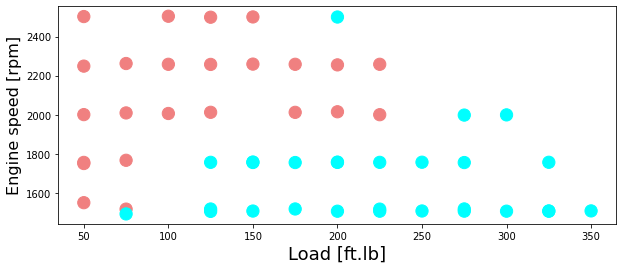

In [160]:
colors = {0: 'lightcoral', 1:'aqua', 2:'green', 3:'coral', 4:'orange', 5:'black'}

area = 150
plt.figure(1, figsize=(10, 4))
plt.scatter(train['Load [ft.lb]'], train['Engine speed [rpm]'], s=area, c=np.array(train['High NOx'].map(colors).tolist()), alpha=1)
plt.xlabel('Load [ft.lb]', fontsize=18)
plt.ylabel('Engine speed [rpm]', fontsize=16)

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 0.1, X[0, :].max() + 0.1
    y_min, y_max = X[1, :].min() - 0.1, X[1, :].max() + 0.1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    
    
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    area = 30
    plt.scatter(X[0,:], X[1,:], s=area, c=np.array(train['High NOx'].map(colors).tolist()), alpha=1)
    plt.xlabel('Load [ft.lb]', fontsize=12)
    plt.ylabel('Engine speed [rpm]', fontsize=12)

4

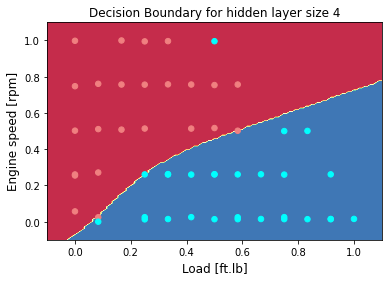

In [161]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))
n_h

**Vary the size of the hidden layer**



Plot as a function of hidden layers



Accuracy for 1 hidden units: 92.3076923076923 %
Accuracy test for 1 hidden units: 90.0 %
Accuracy for 2 hidden units: 92.3076923076923 %
Accuracy test for 2 hidden units: 90.0 %
Accuracy for 3 hidden units: 92.3076923076923 %
Accuracy test for 3 hidden units: 90.0 %
Accuracy for 4 hidden units: 92.3076923076923 %
Accuracy test for 4 hidden units: 90.0 %
Accuracy for 5 hidden units: 92.3076923076923 %
Accuracy test for 5 hidden units: 90.0 %
Accuracy for 20 hidden units: 92.3076923076923 %
Accuracy test for 20 hidden units: 90.0 %
Accuracy for 50 hidden units: 92.3076923076923 %
Accuracy test for 50 hidden units: 90.0 %


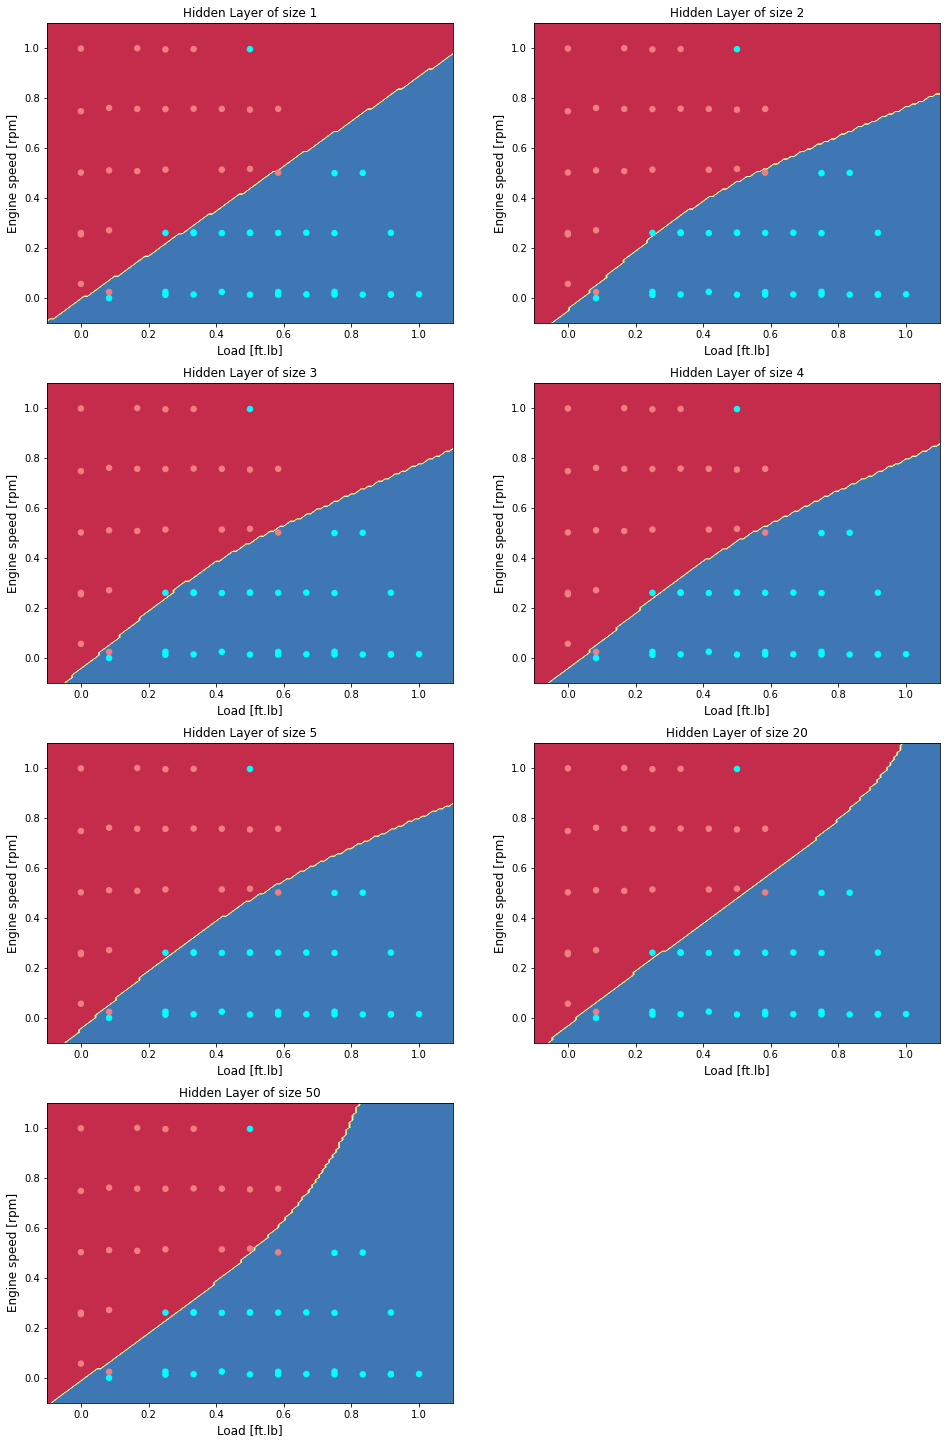

In [162]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    predictions_test = predict(parameters, Xts)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    accuracy_test = float((np.dot(Yts,predictions_test.T) + np.dot(1-Yts,1-predictions_test.T))/float(Yts.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
    print ("Accuracy test for {} hidden units: {} %".format(n_h, accuracy_test))

### ANN - Example L2 Regularization



**Use L2 regularization to avoid overfitting**



-   The standard way to avoid overfitting is called L2 regularization
-   It consists of appropriately modifying your cost function, from:

$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} $$

-   To:

$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{logistic} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} $$

-   modify the cost and observe the consequences.



**structure of cost with regularization**



The structure to compute cost with regularization



need to have new functions for



1.  compute the cost function: `compute_cost_with_regularization()`
2.  forward propagation:  `forward_propagation_reg`
3.  backward propagation: `Backward_propagation_with_regularization`
4.  Prediction; `predict_reg`
5.  Model: `model`



**Regularization cost function**



In [163]:
def compute_cost_with_regularization(A2, Y, parameters, lambd):
    """
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model

    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    
    cross_entropy_cost = compute_cost(A2, Y, parameters) # This gives you the cross-entropy part of the cost
    
    L2_regularization_cost = 1/m * lambd/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

**Backward propagation with regularization**



-   implement `Backward_propagation_with_regularization`
-   the changes from before are only `dW1`, `dW2` and `dW3`.
-   for each, add the regularization term's gradient $\frac{d}{dW} ( \frac{1}{2}\frac{\lambda}{m}  W^2) = \frac{\lambda}{m} W$



In [164]:
def backward_propagation_with_regularization(X, Y, cache, lambd):
    """

    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    lambd -- regularization hyperparameter, scalar

    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    
    

    dZ2 =  A2 - Y



    dW2 = 1./m * np.dot(dZ2, A1.T) + lambd/m * W2
    

    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))


    dW1 = 1./m * np.dot(dZ1, X.T) + lambd/m * W1
    

    db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

**Forward propagation with regularization**



In [165]:
def forward_propagation_reg(X, parameters):
    """

    X -- input dataset, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()

    loss -- the loss function (vanilla logistic loss)
    """
        
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    
    return A2, cache

**Predict with regularization**



In [166]:
def predict_reg(X, y, parameters):
    """

    X -- data set of examples you would like to label
    parameters -- parameters of the trained model

    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    # Forward propagation
    a2, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a2.shape[1]):
        if a2[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    # print results

    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p

**Implement the model**



In [167]:
def model(X, Y,n_h, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0.01):
    """

    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.

    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)


    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        
        a2, cache = forward_propagation_reg(X, parameters)

        
        # Cost function
        if lambd == 0:
            cost = compute_cost(a2, Y)
        else:
            cost = compute_cost_with_regularization(a2, Y, parameters, lambd)
            
        # Backward propagation.

        if lambd == 0:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)

        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Look at the cost versus iterations



Cost after iteration 0: 0.6926849577060623
Cost after iteration 10000: 0.2529361456370044
Cost after iteration 20000: 0.2261577630297428


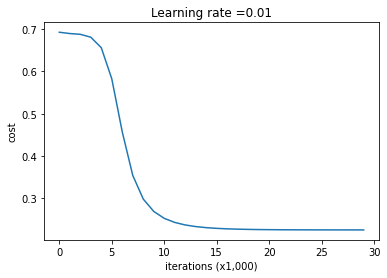

On the train set:
Accuracy: 0.9038461538461539
On the test set:
Accuracy: 0.9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


In [168]:
parameters_reg = model(X, Y, n_h = 50,learning_rate = 0.01, lambd = 0.001)
print ("On the train set:")
predictions_train = predict_reg(X, Y, parameters_reg)
print ("On the test set:")
predictions_test = predict_reg(Xts, Yts, parameters_reg)

### ANN - Example classification - use sklearn toolbox



-   Using toolbox of ANN



In [169]:
#import necessary libraries
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
%matplotlib inline


# from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model

**Import data and show data and plot**



In [170]:
data = pd.read_csv('https://raw.githubusercontent.com/arminnorouzi/ML-developed_course/main/Data/Engine_NOx_classification.csv')
data.head()

,Load [ft.lb],Engine speed [rpm],mf [mg/stroke],Pr [PSI],NOx [ppm],High NOx
0,50,2502.400000,31.222326,15285.16744,103.899724,0
1,50,2248.666667,30.116667,15155.13333,112.610181,0
2,75,2502.000000,38.300000,15356.00000,114.789893,0
3,100,2504.000000,42.900000,15296.00000,125.411970,0
4,75,2262.000000,34.100000,15254.00000,126.524679,0


**Training data**



Text(0, 0.5, 'Engine speed [rpm]')

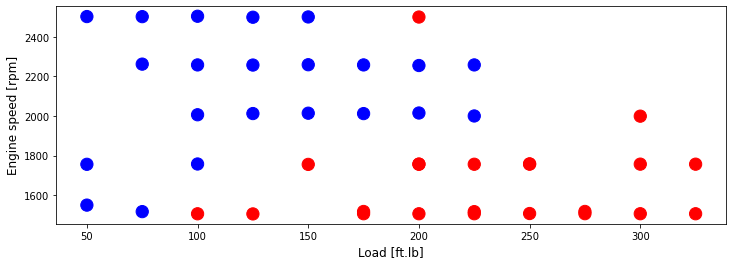

In [171]:
cdf = data[['Load [ft.lb]','Engine speed [rpm]','mf [mg/stroke]','Pr [PSI]', 'NOx [ppm]', 'High NOx']]

msk = np.random.rand(len(data)) < 0.8
train = cdf[msk]
test = cdf[~msk]

colors = {0: 'blue', 1:'red', 2:'green', 3:'coral', 4:'orange', 5:'black'}

area = 150
plt.figure(1, figsize=(12, 4))
plt.scatter(train['Load [ft.lb]'], train['Engine speed [rpm]'], s=area, c=np.array(train['High NOx'].map(colors).tolist()), alpha=1)

plt.xlabel('Load [ft.lb]', fontsize=12)
plt.ylabel('Engine speed [rpm]', fontsize=12)

**Test data**



Text(0, 0.5, 'Engine speed [rpm]')

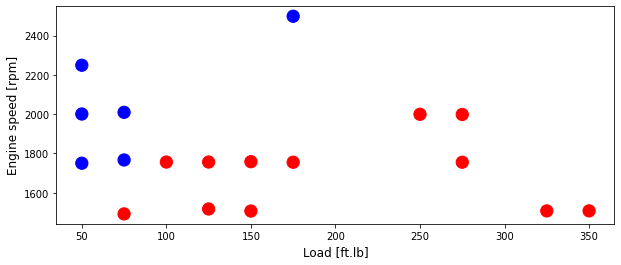

In [172]:
area = 150
plt.figure(1, figsize=(10, 4))
plt.scatter(test['Load [ft.lb]'], test['Engine speed [rpm]'], s=area, c=np.array(test['High NOx'].map(colors).tolist()), alpha=1)

plt.xlabel('Load [ft.lb]', fontsize=12)
plt.ylabel('Engine speed [rpm]', fontsize=12)

**Set Test and training data**



In [173]:
from sklearn import preprocessing
import numpy as np

train_x = np.asanyarray(train[['Load [ft.lb]','Engine speed [rpm]']])
train_y = np.asanyarray(train[['High NOx']])

test_x = np.asanyarray(test[['Load [ft.lb]','Engine speed [rpm]']])
test_y = np.asanyarray(test[['High NOx']])


min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(train_x)
X_test_minmax = min_max_scaler.transform(test_x)

**ANN Classifier**



In [174]:
X = X_train_minmax
Y = train_y

Xts = X_test_minmax
Yts = test_y

from sklearn.neural_network import MLPClassifier
n_h = 5

In [175]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(n_h, 1), random_state=1, learning_rate_init = 0.1, activation = 'logistic')
clf.fit(X, np.ravel(Y,order='C'))

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(5, 1),
              learning_rate_init=0.1, random_state=1, solver='lbfgs')

In [176]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**Plot for hidden layer size of 5**



Text(0, 0.5, 'Engine speed [rpm]')

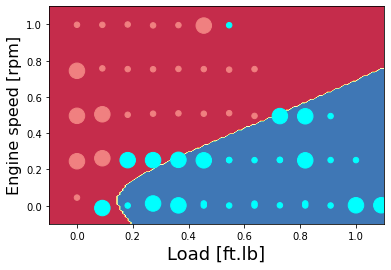

In [177]:
colors = {0: 'lightcoral', 1:'aqua', 2:'green', 3:'coral', 4:'orange', 5:'black'}
X_plot = X_train_minmax.T
Y_plot = train_y.T

X_plot_ts = X_test_minmax.T
Y_plot_ts = test_y.T

# Set min and max values and give it some padding
x_min, x_max = X_plot[0, :].min() - 0.1, X_plot[0, :].max() + 0.1
y_min, y_max = X_plot[1, :].min() - 0.1, X_plot[1, :].max() + 0.1
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel().T, yy.ravel().T])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
area = 30
plt.scatter(X_plot[0,:], X_plot[1,:], s=area, c=np.array(train['High NOx'].map(colors).tolist()), alpha=1)
plt.scatter(X_plot_ts[0,:], X_plot_ts[1,:], s=8*area, c=np.array(test['High NOx'].map(colors).tolist()), alpha=1)
plt.xlabel('Load [ft.lb]', fontsize=18)
plt.ylabel('Engine speed [rpm]', fontsize=16)

**Show the prediction accuracy**



In [178]:
predictions = clf.predict(X)
predictions_test = clf.predict(Xts)
accuracy = float((np.dot(Y.T,predictions.T) + np.dot(1-Y.T,1-predictions.T))/float(Y.size)*100)
accuracy_test = float((np.dot(Yts.T,predictions_test.T) + np.dot(1-Yts.T,1-predictions_test.T))/float(Yts.size)*100)
print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
print ("Accuracy test for {} hidden units: {} %".format(n_h, accuracy_test))

Accuracy for 5 hidden units: 97.72727272727273 %
Accuracy test for 5 hidden units: 83.33333333333334 %


**Now examine the effect of the hidden layer size**



Accuracy for 5 hidden units: 97.72727272727273 %
Accuracy test for 5 hidden units: 83.33333333333334 %
Accuracy for 10 hidden units: 100.0 %
Accuracy test for 10 hidden units: 77.77777777777779 %
Accuracy for 15 hidden units: 97.72727272727273 %
Accuracy test for 15 hidden units: 77.77777777777779 %
Accuracy for 20 hidden units: 100.0 %
Accuracy test for 20 hidden units: 83.33333333333334 %
Accuracy for 30 hidden units: 100.0 %
Accuracy test for 30 hidden units: 77.77777777777779 %
Accuracy for 50 hidden units: 97.72727272727273 %
Accuracy test for 50 hidden units: 77.77777777777779 %


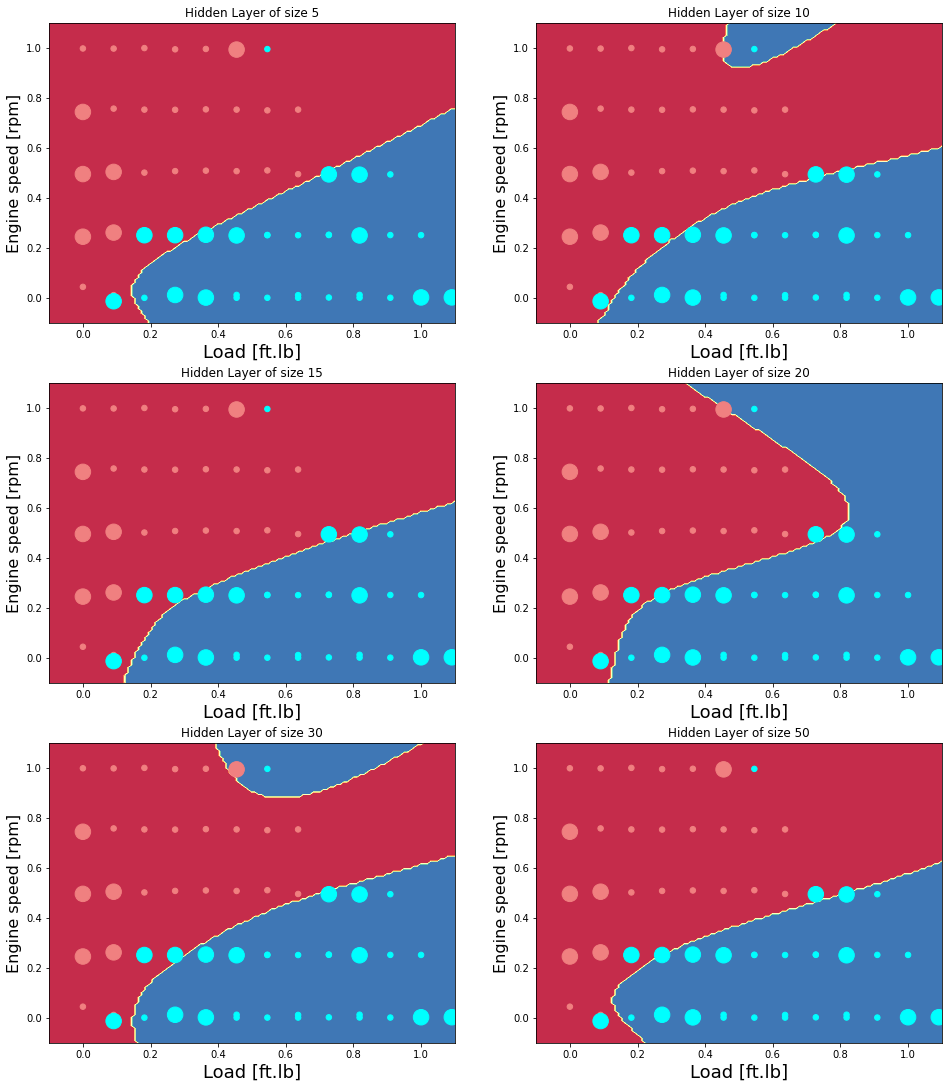

In [179]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [5, 10, 15, 20, 30, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    clf = MLPClassifier(solver='lbfgs', max_iter = 1000, alpha=1e-5, hidden_layer_sizes=(n_h, 1), random_state=1, learning_rate_init = 0.1, activation = 'logistic')
    clf.fit(X, np.ravel(Y,order='C'))
    
    

    predictions = clf.predict(X)
    predictions_test = clf.predict(Xts)
    accuracy = float((np.dot(Y.T,predictions.T) + np.dot(1-Y.T,1-predictions.T))/float(Y.size)*100)
    accuracy_test = float((np.dot(Yts.T,predictions_test.T) + np.dot(1-Yts.T,1-predictions_test.T))/float(Yts.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
    print ("Accuracy test for {} hidden units: {} %".format(n_h, accuracy_test))
    
    X_plot = X_train_minmax.T
    Y_plot = train_y.T
    
    X_plot_ts = X_test_minmax.T
    Y_plot_ts = test_y.T
    
    # Set min and max values and give it some padding
    x_min, x_max = X_plot[0, :].min() - 0.1, X_plot[0, :].max() + 0.1
    y_min, y_max = X_plot[1, :].min() - 0.1, X_plot[1, :].max() + 0.1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel().T, yy.ravel().T])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    area = 30
    plt.scatter(X_plot[0,:], X_plot[1,:], s=area, c=np.array(train['High NOx'].map(colors).tolist()), alpha=1)
    plt.scatter(X_plot_ts[0,:], X_plot_ts[1,:], s=8*area, c=np.array(test['High NOx'].map(colors).tolist()), alpha=1)
    plt.xlabel('Load [ft.lb]', fontsize=18)
    plt.ylabel('Engine speed [rpm]', fontsize=16)

**Examine the effect of regularization (Hidden layer neurons = 15)**



Accuracy for 10 hidden units: 97.72727272727273 %
Accuracy test for 10 hidden units: 77.77777777777779 %
Accuracy for 10 hidden units: 97.72727272727273 %
Accuracy test for 10 hidden units: 77.77777777777779 %
Accuracy for 10 hidden units: 100.0 %
Accuracy test for 10 hidden units: 77.77777777777779 %
Accuracy for 10 hidden units: 100.0 %
Accuracy test for 10 hidden units: 77.77777777777779 %


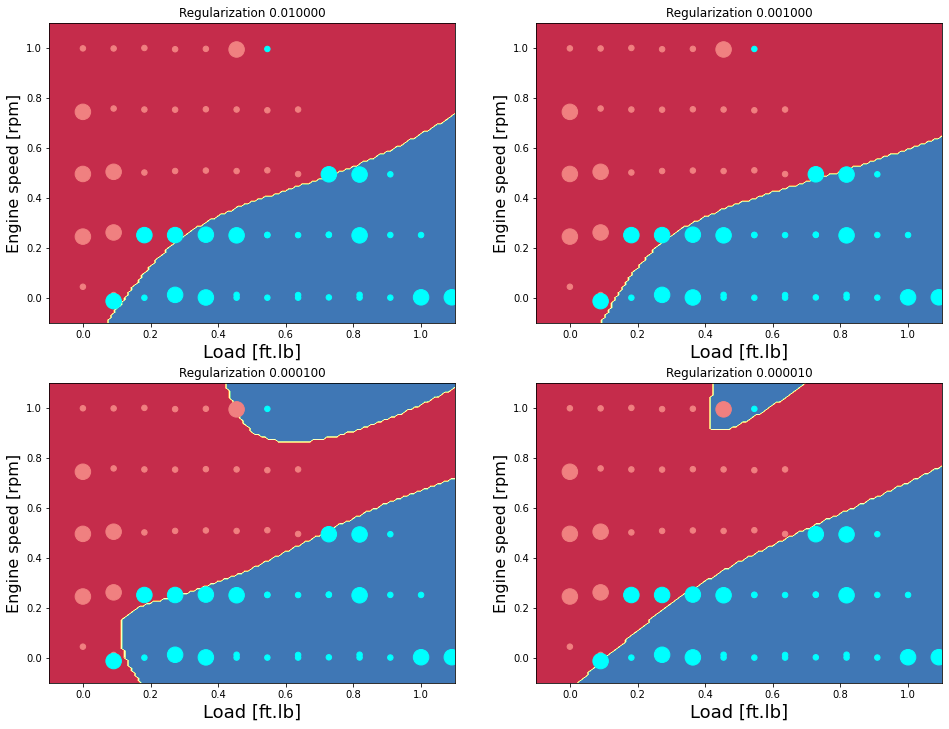

In [180]:
n_h = 10
plt.figure(figsize=(16, 32))
alpha = np.dot(10,[0.001, 0.0001, 0.00001, 0.000001])
for i, alp in enumerate(alpha):
    
    plt.subplot(5, 2, i+1)
    plt.title('Regularization %1.6f' %alp)
    clf = MLPClassifier(solver='lbfgs', max_iter = 1000, alpha=alp, hidden_layer_sizes=(n_h, 1), random_state=1, learning_rate_init = 0.1, activation = 'logistic')
    clf.fit(X, np.ravel(Y,order='C'))
    
    
    predictions = clf.predict(X)
    predictions_test = clf.predict(Xts)
    accuracy = float((np.dot(Y.T,predictions.T) + np.dot(1-Y.T,1-predictions.T))/float(Y.size)*100)
    accuracy_test = float((np.dot(Yts.T,predictions_test.T) + np.dot(1-Yts.T,1-predictions_test.T))/float(Yts.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
    print ("Accuracy test for {} hidden units: {} %".format(n_h, accuracy_test))
    
    X_plot = X_train_minmax.T
    Y_plot = train_y.T
    
    X_plot_ts = X_test_minmax.T
    Y_plot_ts = test_y.T
    
    # Set min and max values and give it some padding
    x_min, x_max = X_plot[0, :].min() - 0.1, X_plot[0, :].max() + 0.1
    y_min, y_max = X_plot[1, :].min() - 0.1, X_plot[1, :].max() + 0.1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel().T, yy.ravel().T])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    area = 30
    plt.scatter(X_plot[0,:], X_plot[1,:], s=area, c=np.array(train['High NOx'].map(colors).tolist()), alpha=1)
    plt.scatter(X_plot_ts[0,:], X_plot_ts[1,:], s=8*area, c=np.array(test['High NOx'].map(colors).tolist()), alpha=1)
    plt.xlabel('Load [ft.lb]', fontsize=18)
    plt.ylabel('Engine speed [rpm]', fontsize=16)

### ANN - Example Regression - one hidden layer - toolbox



**One Hidden layer ANN - toolbox - regression problem**



Using toolbox of ANN , import libraries



In [181]:
#import necessary libraries
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')


# from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model

**Import data and show data and plot**



In [182]:
data = pd.read_csv('https://raw.githubusercontent.com/arminnorouzi/ML-developed_course/main/Data/Engine_NOx_classification.csv')
data.head()

,Load [ft.lb],Engine speed [rpm],mf [mg/stroke],Pr [PSI],NOx [ppm],High NOx
0,50,2502.400000,31.222326,15285.16744,103.899724,0
1,50,2248.666667,30.116667,15155.13333,112.610181,0
2,75,2502.000000,38.300000,15356.00000,114.789893,0
3,100,2504.000000,42.900000,15296.00000,125.411970,0
4,75,2262.000000,34.100000,15254.00000,126.524679,0


In [183]:
cdf = data[['Load [ft.lb]','Engine speed [rpm]','mf [mg/stroke]','Pr [PSI]', 'NOx [ppm]']]

msk = np.random.rand(len(data)) < 0.8
train = cdf[msk]
test = cdf[~msk]

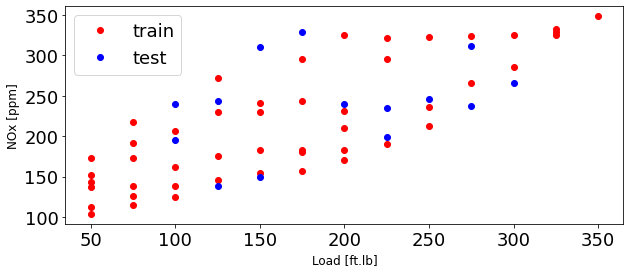

In [184]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

plt.figure(1, figsize=(10, 4))
plt.plot(train['Load [ft.lb]'], train['NOx [ppm]'], 'or', label = 'train')
plt.plot(test['Load [ft.lb]'], test['NOx [ppm]'], 'ob', label = 'test')
plt.xlabel('Load [ft.lb]', fontsize=12)
plt.ylabel('NOx [ppm]', fontsize=12)
plt.legend(fontsize=18)

**Set Test and training data**



In [185]:
from sklearn import preprocessing

train_x = np.asanyarray(train[['Load [ft.lb]','Engine speed [rpm]','mf [mg/stroke]','Pr [PSI]']])

test_x = np.asanyarray(test[['Load [ft.lb]','Engine speed [rpm]','mf [mg/stroke]','Pr [PSI]']])

train_y = np.asanyarray(train[['NOx [ppm]']])

test_y = np.asanyarray(test[['NOx [ppm]']])


min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(train_x)
X_test_minmax = min_max_scaler.transform(test_x)

**Train and plot**



`sklearn` for NN regression



In [186]:
from sklearn.neural_network import MLPRegressor

-   `solver`  details in next chapter
-   `learning_rate_init` called $\alpha$ in our notes
-   `activation` has options
-   `learning_rate` can also be changed to decay



In [187]:
n_h = 15
regr_ANN = MLPRegressor(solver='adam', alpha=0.1, learning_rate_init=0.01, max_iter=100000, 
                        verbose=False, activation = 'tanh',learning_rate= 'constant',
                        hidden_layer_sizes=[n_h]).fit(X_train_minmax, train_y.ravel())

In [188]:
train_y_hat = regr_ANN.predict(X_train_minmax)
test_y_hat = regr_ANN.predict(X_test_minmax)

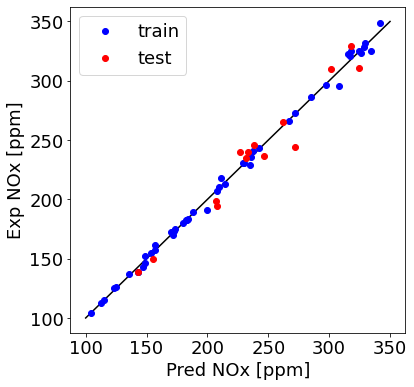

In [189]:
plt.figure(1, figsize=(6, 6))
plt.plot([100,350], [100, 350],  '-k')
plt.plot(train_y_hat, train['NOx [ppm]'], 'ob', label = 'train')
plt.plot(test_y_hat, test['NOx [ppm]'], 'or', label = 'test')
plt.ylabel("Exp NOx [ppm]", fontsize=18)
plt.xlabel("Pred NOx [ppm]", fontsize=18)
plt.legend(fontsize=18)

**Check R-squared**



In [190]:
r2_test = regr_ANN.score(X_test_minmax, test_y.ravel())
r2_train = regr_ANN.score(X_train_minmax, train_y.ravel())

print ('Train R^2= %1.3f' % r2_train)
print ('Test R^2= %1.3f' % r2_test)

Train R^2= 0.997
Test R^2= 0.955


**Examine the effect of number of neurons in a hidden layer and plot**



R^2 train for 1 hidden units: 0.9377761225850547 
R^2 test for 1 hidden units: 0.8437256735625067 
R^2 train for 2 hidden units: 0.9775168168103674 
R^2 test for 2 hidden units: 0.9210320093836087 
R^2 train for 5 hidden units: 0.9906811359778658 
R^2 test for 5 hidden units: 0.9321821011197029 
R^2 train for 10 hidden units: 0.9940948057516248 
R^2 test for 10 hidden units: 0.9522793432090032 
R^2 train for 20 hidden units: 0.9971779399729322 
R^2 test for 20 hidden units: 0.9135918528196703 
R^2 train for 40 hidden units: 0.9986755038983455 
R^2 test for 40 hidden units: 0.9441233783526757 


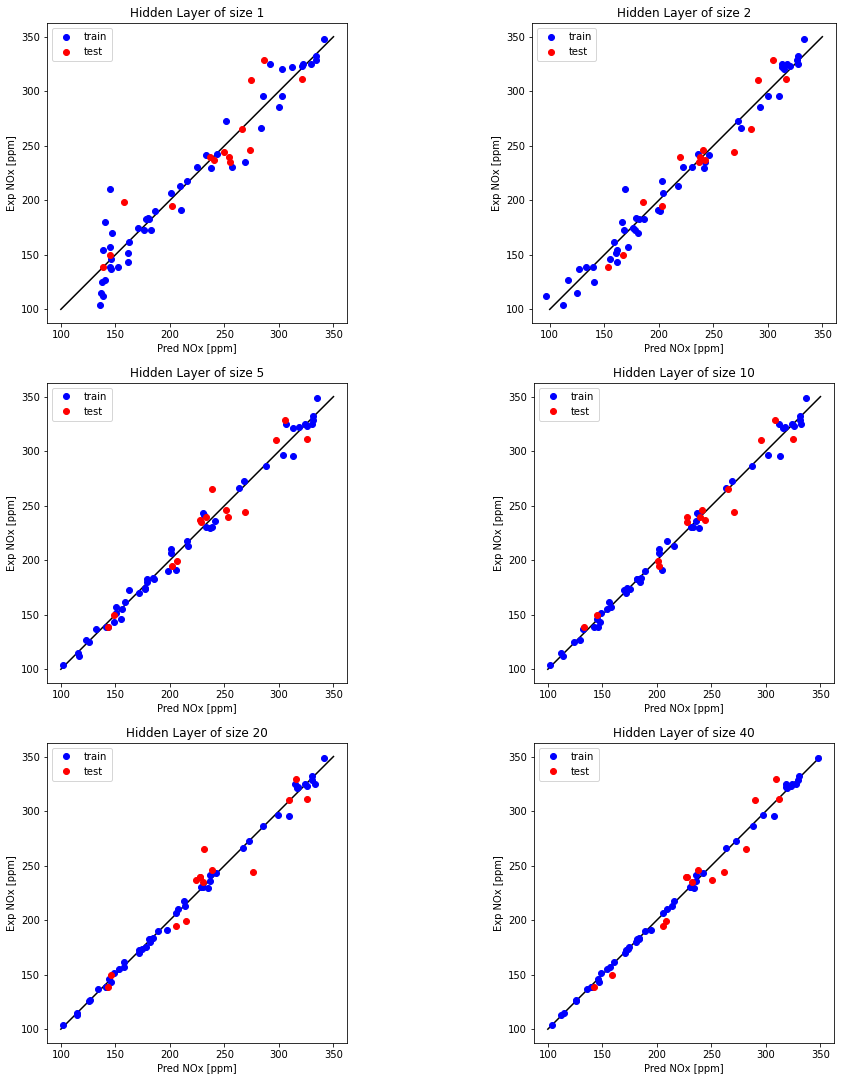

In [191]:
font = {'family' : 'normal',
        'size'   : 10}
plt.rc('font', **font)

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 5, 10, 20, 40]
for i, n_h in enumerate(hidden_layer_sizes):
    
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    regr_ANN = MLPRegressor(solver='adam', alpha=0.1, learning_rate_init=0.01, max_iter=100000, 
                        verbose=False, activation = 'tanh',learning_rate= 'constant',
                        hidden_layer_sizes=[n_h]).fit(X_train_minmax, train_y.ravel())
    
    
    train_y_hat = regr_ANN.predict(X_train_minmax)
    test_y_hat = regr_ANN.predict(X_test_minmax)
    plt.plot([100,350], [100, 350],  '-k')
    plt.plot(train_y_hat, train['NOx [ppm]'], 'ob', label = 'train')
    plt.plot(test_y_hat, test['NOx [ppm]'], 'or', label = 'test')
    plt.ylabel("Exp NOx [ppm]", fontsize=10)
    plt.xlabel("Pred NOx [ppm]", fontsize=10)
    plt.legend(fontsize=10)
    plt.gca().set_aspect('equal', adjustable='box')
    r2_test = regr_ANN.score(X_test_minmax, test_y.ravel())
    r2_train = regr_ANN.score(X_train_minmax, train_y.ravel())

    print ("R^2 train for {} hidden units: {} ".format(n_h, r2_train))
    print ("R^2 test for {} hidden units: {} ".format(n_h, r2_test))

**Examine the effect of regularization (Hidden layer neurons = 20)**



R^2 train for 1 regularization : 0.9948468911797148 
R^2 test for 1 regularization : 0.937121524773108 
R^2 train for 0.1 regularization : 0.9969084454888879 
R^2 test for 0.1 regularization : 0.9361928123292227 
R^2 train for 0.01 regularization : 0.9988570671629112 
R^2 test for 0.01 regularization : 0.8885388886828383 
R^2 train for 0.001 regularization : 0.9994410938574019 
R^2 test for 0.001 regularization : 0.8861716262759315 
R^2 train for 0.0001 regularization : 0.9987023637402073 
R^2 test for 0.0001 regularization : 0.9201423818210513 
R^2 train for 1e-05 regularization : 0.999757171784672 
R^2 test for 1e-05 regularization : 0.8634745758141875 


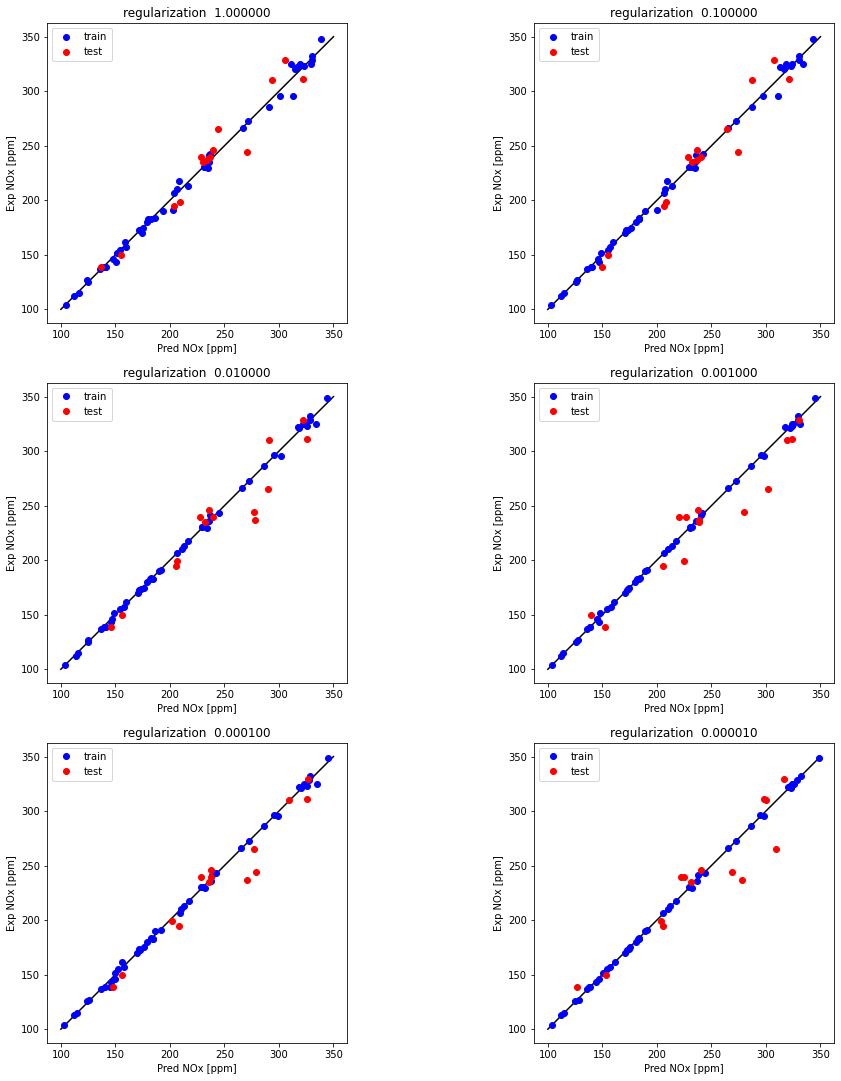

In [192]:
n_h = 20
font = {'family' : 'normal',
        'size'   : 10}

plt.rc('font', **font)

plt.figure(figsize=(16, 32))
alpha = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
for i, alp in enumerate(alpha):
    
    plt.subplot(5, 2, i+1)
    plt.title('regularization  %1.6f' % alp)
    regr_ANN = MLPRegressor(solver='adam', alpha=alp, learning_rate_init=0.01, max_iter=100000, 
                        verbose=False, activation = 'tanh',learning_rate= 'constant',
                        hidden_layer_sizes=[n_h]).fit(X_train_minmax, train_y.ravel())
    
    
    train_y_hat = regr_ANN.predict(X_train_minmax)
    test_y_hat = regr_ANN.predict(X_test_minmax)
    plt.plot([100,350], [100, 350],  '-k')
    plt.plot(train_y_hat, train['NOx [ppm]'], 'ob', label = 'train')
    plt.plot(test_y_hat, test['NOx [ppm]'], 'or', label = 'test')
    plt.ylabel("Exp NOx [ppm]", fontsize=10)
    plt.xlabel("Pred NOx [ppm]", fontsize=10)
    plt.legend(fontsize=10)
    plt.gca().set_aspect('equal', adjustable='box')
    r2_test = regr_ANN.score(X_test_minmax, test_y.ravel())
    r2_train = regr_ANN.score(X_train_minmax, train_y.ravel())

    print ("R^2 train for {} regularization : {} ".format(alp, r2_train))
    print ("R^2 test for {} regularization : {} ".format(alp, r2_test))

## References

[1] Mohamad H Hassoun et al. Fundamentals of articial neural networks. MIT press, 1995.

[2] https://www.coursera.org/specializations/deep-learning?utm_source=gg&utm_medium=sem&utm_content=01-CatalogDSA-ML2-US&campaignid=12490862811&adgroupid=119269357576&device=c&keyword=&matchtype=&network=g&devicemodel=&adpostion=&creativeid=503940597764&hide_mobile_promo&gclid=CjwKCAjw8sCRBhA6EiwA6_IF4Rtt8Tj3h_VRvx2wJA2vdlkTnb2bPWMTqZ48fXQPN01UwUzHY70cnhoCt38QAvD_BwE
